## Crypto Price Predictor: Real-Time Machine Learning Forecasting

In [4]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\amban\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\amban\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


1. Load the Data

In [ ]:
#Load the dataset
df=pd.read_csv("cryptocurrency.csv")

In [ ]:
# Check the shape, columns and first 10 rows
print("Shape: ", df.shape)
print("Columns: ", df.columns)
df.head(10)

Shape:  (85986, 9)
Columns:  Index(['timestamp', 'name', 'symbol', 'price_usd', 'vol_24h', 'total_vol',
       'chg_24h', 'chg_7d', 'market_cap'],
      dtype='object')


,timestamp,name,symbol,price_usd,vol_24h,total_vol,chg_24h,chg_7d,market_cap
0,2025-09-12 02:34:12,Dogecoin,DOGE,0.256098,$3.74B,2.53%,+4.75%,+20.04%,$38.71B
1,2025-09-12 02:34:12,USDC,USDC,0.9996,$15.68B,10.46%,0.00%,+0.01%,$72.45B
2,2025-09-12 02:34:12,Tether USDt,USDT,1.0002,$120.94B,81.27%,+0.00%,+0.02%,$169.41B
3,2025-09-12 02:34:12,Bitcoin,BTC,"115,334.60",$45.60B,30.71%,+1.23%,+3.69%,$2.30T
4,2025-09-12 02:34:12,Solana,SOL,228.278,$9.49B,6.46%,+1.89%,+11.98%,$123.96B
5,2025-09-12 02:34:12,XRP,XRP,3.0435,$5.22B,3.50%,+1.89%,+8.01%,$181.13B
6,2025-09-12 02:34:12,Ethereum,ETH,"4,461.00",$35.68B,23.26%,+2.67%,+3.08%,$539.04B
7,2025-09-12 02:34:12,BNB,BNB,901.3,$2.24B,1.53%,+1.03%,+6.51%,$125.72B
8,2025-09-12 01:34:12,Hedera,HBAR,0.24051,$267.92M,0.14%,+2.26%,+11.89%,$10.13B
9,2025-09-12 01:34:12,Dogecoin,DOGE,0.255418,$3.60B,2.05%,+3.97%,+19.28%,$38.34B


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85986 entries, 0 to 85985
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   timestamp   85986 non-null  object
 1   name        85986 non-null  object
 2   symbol      85986 non-null  object
 3   price_usd   85986 non-null  object
 4   vol_24h     85986 non-null  object
 5   total_vol   85986 non-null  object
 6   chg_24h     85986 non-null  object
 7   chg_7d      85970 non-null  object
 8   market_cap  85950 non-null  object
dtypes: object(9)
memory usage: 5.9+ MB


2. Focus on One Symbol

In [ ]:
# Check which symbols are present and how many rows each has
print(df["symbol"].value_counts().head())

# Filter for DOGE
df_doge=df[df["symbol"]=="DOGE"].copy()
print("DOGE rows: ", df_doge.shape[0])
df_doge.head(10)


symbol
USDT    4297
SOL     4297
USDC    4297
XRP     4296
XLM     4296
Name: count, dtype: int64
DOGE rows:  4295


,timestamp,name,symbol,price_usd,vol_24h,total_vol,chg_24h,chg_7d,market_cap
0,2025-09-12 02:34:12,Dogecoin,DOGE,0.256098,$3.74B,2.53%,+4.75%,+20.04%,$38.71B
9,2025-09-12 01:34:12,Dogecoin,DOGE,0.255418,$3.60B,2.05%,+3.97%,+19.28%,$38.34B
44,2025-09-12 00:34:12,Dogecoin,DOGE,0.250899,$3.52B,2.05%,+2.92%,+18.23%,$37.86B
61,2025-09-11 23:34:12,Dogecoin,DOGE,0.251236,$3.62B,2.05%,+4.23%,+18.45%,$37.88B
81,2025-09-11 22:34:12,Dogecoin,DOGE,0.251399,$3.73B,2.05%,+2.85%,+18.68%,$37.88B
101,2025-09-11 21:34:13,Dogecoin,DOGE,0.25033,$3.70B,2.05%,+1.75%,+17.68%,$37.67B
121,2025-09-11 20:34:12,Dogecoin,DOGE,0.249695,$3.76B,2.05%,+1.14%,+17.62%,$37.68B
141,2025-09-11 19:34:11,Dogecoin,DOGE,0.248425,$3.78B,2.05%,+1.25%,+16.28%,$37.27B
161,2025-09-11 18:34:13,Dogecoin,DOGE,0.248888,$3.76B,2.05%,+2.29%,+16.27%,$37.59B
181,2025-09-11 17:34:16,Dogecoin,DOGE,0.248042,$3.73B,2.05%,+2.24%,+15.81%,$37.66B


3. Clean Timestamp and Price

In [ ]:
# Convert timestamp to datetime
df_doge['timestamp']=pd.to_datetime(df_doge['timestamp'], errors='coerce')

# Sort by time
df_doge=df_doge.sort_values('timestamp').reset_index(drop=True)

# Convert price_usd to numeric (remove $, comma)
df_doge['price_usd']=pd.to_numeric(
    df_doge['price_usd'].astype(str).str.replace(r'[\$]', '', regex=True),
    errors='coerce'
)

print(df_doge.info())
df_doge.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4295 entries, 0 to 4294
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   timestamp   4295 non-null   datetime64[ns]
 1   name        4295 non-null   object        
 2   symbol      4295 non-null   object        
 3   price_usd   4295 non-null   float64       
 4   vol_24h     4295 non-null   object        
 5   total_vol   4295 non-null   object        
 6   chg_24h     4295 non-null   object        
 7   chg_7d      4295 non-null   object        
 8   market_cap  4295 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 302.1+ KB
None


,timestamp,name,symbol,price_usd,vol_24h,total_vol,chg_24h,chg_7d,market_cap
0,2025-03-17 00:34:14,Dogecoin,DOGE,0.169610,$903.23M,1.54%,-4.18%,-0.58%,$25.08B
1,2025-03-17 01:34:12,Dogecoin,DOGE,0.168746,$912.26M,1.52%,-5.05%,+0.02%,$24.98B
2,2025-03-17 02:34:12,Dogecoin,DOGE,0.167833,$929.95M,1.52%,-4.83%,-0.41%,$24.90B
3,2025-03-17 03:34:12,Dogecoin,DOGE,0.169436,$939.04M,1.52%,-3.93%,+0.40%,$25.05B
4,2025-03-17 04:34:11,Dogecoin,DOGE,0.170698,$957.71M,1.52%,-2.95%,+0.69%,$25.32B
5,2025-03-17 05:34:12,Dogecoin,DOGE,0.171616,$953.45M,1.50%,-1.26%,-1.24%,$25.44B
6,2025-03-17 06:34:11,Dogecoin,DOGE,0.172221,$958.29M,1.50%,-1.10%,-0.39%,$25.50B
7,2025-03-17 07:34:12,Dogecoin,DOGE,0.173047,$971.92M,1.50%,-1.03%,+0.44%,$25.68B
8,2025-03-17 08:34:12,Dogecoin,DOGE,0.171900,$974.07M,1.50%,-1.58%,-1.06%,$25.59B
9,2025-03-17 09:34:12,Dogecoin,DOGE,0.171607,$992.07M,1.50%,-2.35%,-0.99%,$25.53B


4. Plot the Price

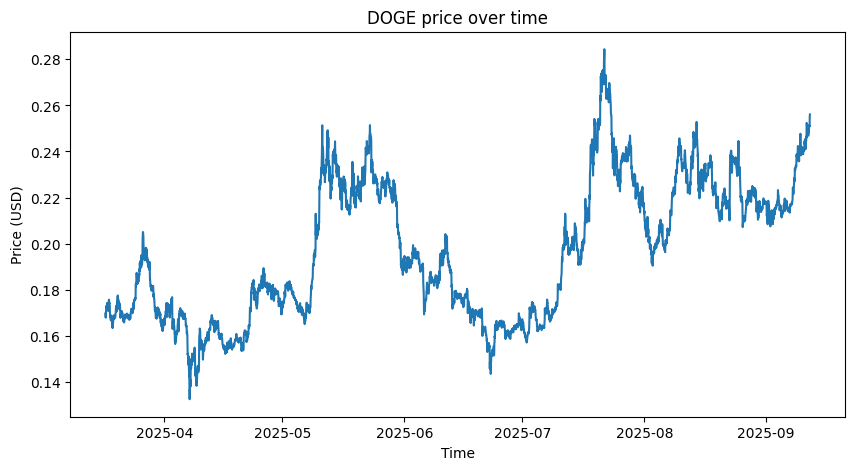

In [ ]:

plt.figure(figsize=(10, 5))
plt.plot(df_doge['timestamp'], df_doge['price_usd'])
plt.title("DOGE price over time")
plt.xlabel("Time")
plt.ylabel("Price (USD)")
plt.show()

#### Feature Engineering

1. Create Lag Features

In [ ]:
# Lag features (yesterday, 2 days ago, etc.)
df_doge['lag_1']=df_doge['price_usd'].shift(1)
df_doge['lag_2']=df_doge['price_usd'].shift(2)
df_doge['lag_3']=df_doge['price_usd'].shift(3)

2. Calculate Returns (percentage change)

In [ ]:
# Daily return (percentage change)
df_doge['return_1']=df_doge['price_usd'].pct_change()

# 3-day return
df_doge['return_3']=df_doge['price_usd'].pct_change(3)

3. Rolling Statistics

In [13]:
# Rolling mean and std (window= 3 days, 7 days)
df_doge['rolling_mean_3']=df_doge['price_usd'].rolling(3).mean()
df_doge['rolling_std_3']=df_doge['price_usd'].rolling(3).std()

df_doge['rolling_mean_7']=df_doge['price_usd'].rolling(7).mean()
df_doge['rolling_std_7']=df_doge['price_usd'].rolling(7).std()

4. Drop Missing Values

In [14]:
df_doge=df_doge.dropna().reset_index(drop=True)
df_doge.head(10)

,timestamp,name,symbol,price_usd,vol_24h,total_vol,chg_24h,chg_7d,market_cap,lag_1,lag_2,lag_3,return_1,return_3,rolling_mean_3,rolling_std_3,rolling_mean_7,rolling_std_7
0,2025-03-17 06:34:11,Dogecoin,DOGE,0.172221,$958.29M,1.50%,-1.10%,-0.39%,$25.50B,0.171616,0.170698,0.169436,0.003525,0.016437,0.171512,0.000767,0.170023,0.001569
1,2025-03-17 07:34:12,Dogecoin,DOGE,0.173047,$971.92M,1.50%,-1.03%,+0.44%,$25.68B,0.172221,0.171616,0.170698,0.004796,0.013761,0.172295,0.000718,0.170514,0.001917
2,2025-03-17 08:34:12,Dogecoin,DOGE,0.171900,$974.07M,1.50%,-1.58%,-1.06%,$25.59B,0.173047,0.172221,0.171616,-0.006628,0.001655,0.172389,0.000592,0.170964,0.001799
3,2025-03-17 09:34:12,Dogecoin,DOGE,0.171607,$992.07M,1.50%,-2.35%,-0.99%,$25.53B,0.171900,0.173047,0.172221,-0.001704,-0.003565,0.172185,0.000761,0.171504,0.001155
4,2025-03-17 10:34:12,Dogecoin,DOGE,0.172156,$1.02B,1.47%,-2.72%,-0.91%,$25.43B,0.171607,0.171900,0.173047,0.003199,-0.005149,0.171888,0.000275,0.171892,0.000718
5,2025-03-17 11:34:11,Dogecoin,DOGE,0.172655,$1.04B,1.47%,-1.64%,-0.38%,$25.64B,0.172156,0.171607,0.171900,0.002899,0.004392,0.172139,0.000524,0.172172,0.000533
6,2025-03-17 12:34:11,Dogecoin,DOGE,0.174281,$1.06B,1.47%,-0.51%,+1.84%,$25.85B,0.172655,0.172156,0.171607,0.009418,0.015582,0.173031,0.001111,0.172552,0.000897
7,2025-03-17 13:34:12,Dogecoin,DOGE,0.173360,$1.14B,1.47%,+0.42%,-0.46%,$25.72B,0.174281,0.172655,0.172156,-0.005285,0.006994,0.173432,0.000815,0.172715,0.000930
8,2025-03-17 14:34:12,Dogecoin,DOGE,0.173584,$1.10B,1.47%,+1.80%,-0.68%,$25.71B,0.173360,0.174281,0.172655,0.001292,0.005381,0.173742,0.000480,0.172792,0.000982
9,2025-03-17 15:34:13,Dogecoin,DOGE,0.172074,$1.04B,1.49%,+2.59%,-2.20%,$25.64B,0.173584,0.173360,0.174281,-0.008699,-0.012663,0.173006,0.000815,0.172817,0.000958


5. Check Feature Correlation

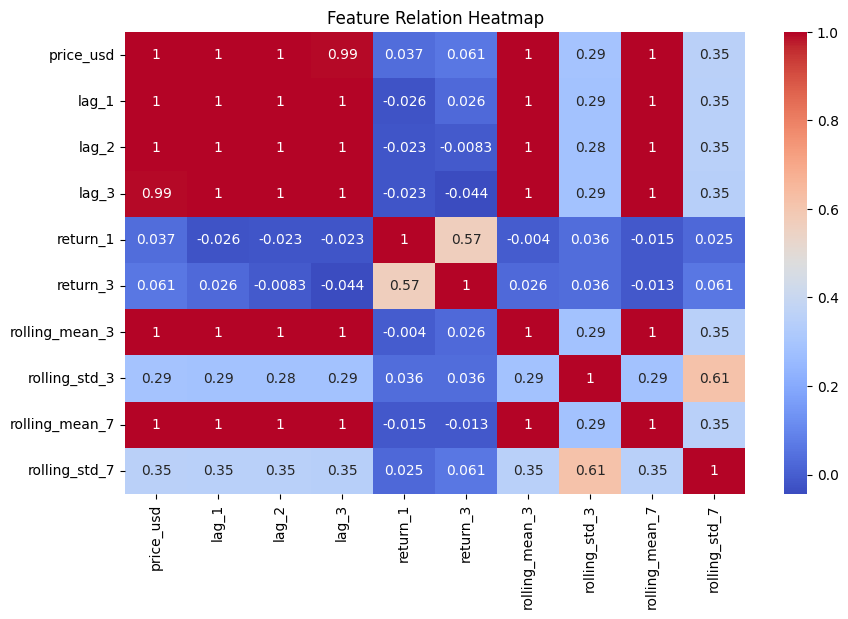

In [15]:
numeric_df=df_doge.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Relation Heatmap")
plt.show()

Create a "Next-Day" Target

In [16]:
df_doge['target']=df_doge['price_usd'].shift(-1)

df_doge=df_doge.dropna().reset_index(drop=True)

#### Model Training

Linear Regression

1. Define Features and Target

In [ ]:
from sklearn.model_selection import train_test_split

# Features (exclude timestamp, symbol, etc.)
numeric_df=df_doge.select_dtypes(include=['float64', 'int64'])
X=numeric_df.drop(columns=['price_usd', 'target'])
y=numeric_df['target']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test=train_test_split(
    X, y, test_size=0.2, shuffle=False
)

print("Train Shape: ", X_train.shape)
print("Test Shape: ", X_test.shape)


Train Shape:  (3430, 9)
Test Shape:  (858, 9)


2. Train a Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize the Model
model=LinearRegression()

# Train
model.fit(X_train, y_train)

# Predict on test set
y_pred=model.predict(X_test)

3. Evaluate Model Performance

In [19]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test, y_pred)

print("RMSE: ", rmse)
print("R2 Score: ", r2)



RMSE:  0.0019513279338800194
R2 Score:  0.9680061689447288


4. Visualize Predictions

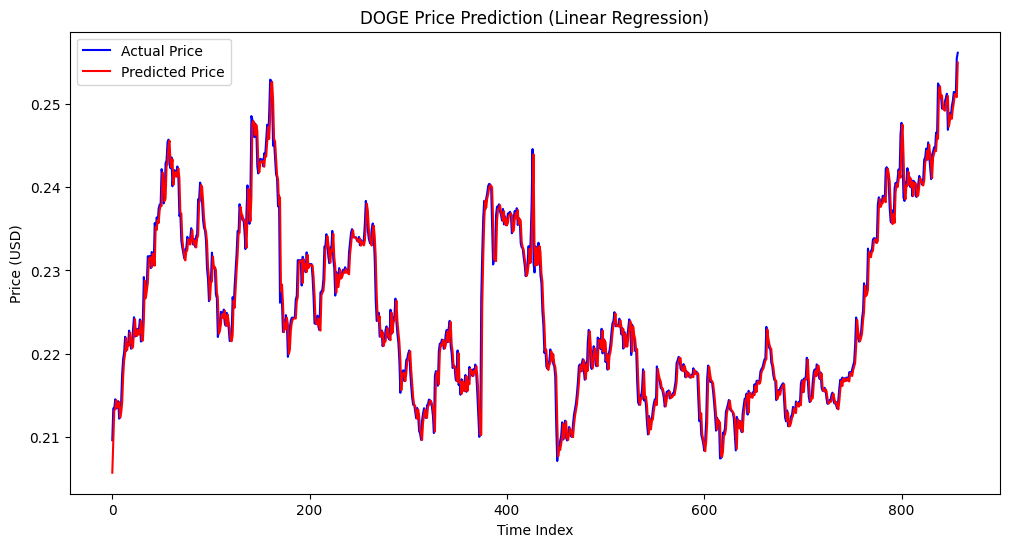

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual Price", color="blue")
plt.plot(y_pred, label="Predicted Price", color="red")
plt.title("DOGE Price Prediction (Linear Regression)")
plt.xlabel("Time Index")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

Random Forest Regressor

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rf=RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf=rf.predict(X_test)

rmse_rf=np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf=r2_score(y_test, y_pred_rf)

print("Random Forest RMSE:", rmse_rf)
print("R2 Score: ", r2_rf)


Random Forest RMSE: 0.002342830743849158
R2 Score:  0.953880185406767


XG Boost Regressor

In [22]:
from xgboost import XGBRegressor

xgb=XGBRegressor(n_estimators=300, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb=xgb.predict(X_test)

rmse_xgb=np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb=r2_score(y_test, y_pred_xgb)

print("XG Boost RMSE: ", rmse_xgb)
print("XG Boost R2 Score: ", r2_xgb)

XG Boost RMSE:  0.002356619512602586
XG Boost R2 Score:  0.9533357099986866


Actual vs Predicted plot (Best Model → Linear Regression)

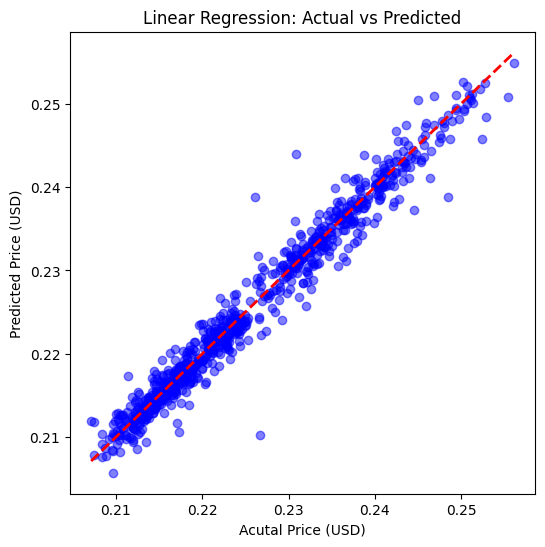

In [24]:
y_pred=model.predict(X_test)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linestyle='--', linewidth=2)

plt.xlabel("Acutal Price (USD)")
plt.ylabel("Predicted Price (USD)")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()

Residual Plot

Text(0.5, 1.0, 'Residual Plot (Linear Regression)')

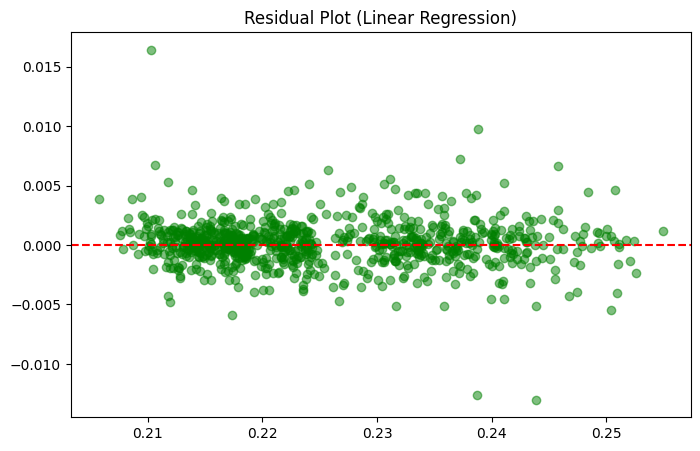

In [25]:
residuals=y_test-y_pred

plt.figure(figsize=(8,5))
plt.scatter(y_pred, residuals, alpha=0.5, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel=("Predicted Price (USD)")
plt.ylabel=("Residuals")
plt.title("Residual Plot (Linear Regression)")

Feature Importance (Random Forest/XG Boost)

TypeError: 'str' object is not callable

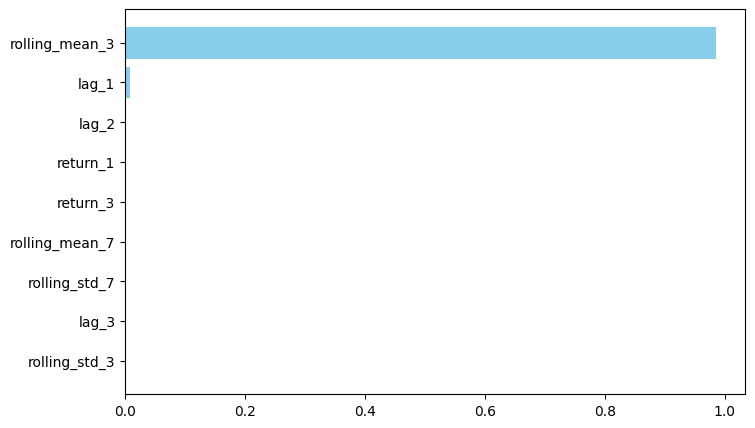

In [26]:
importances=rf.feature_importances_
features=X.columns

feat_imp=pd.DataFrame({"Feature": features, "Importance": importances})
feat_imp=feat_imp.sort_values("Importance", ascending=False)

plt.figure(figsize=(8,5))
plt.barh(feat_imp["Feature"], feat_imp["Importance"], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.title("Feature Importance (Random Forest)")
plt.show()

Cross Validation

In [28]:
from sklearn.model_selection import cross_val_score

cv_scores=cross_val_score(model, X, y, cv=5, scoring='r2')
print("Cross Validation R2 Scores: ", cv_scores)
print("Mean R2: ", cv_scores.mean())

Cross Validation R2 Scores:  [0.98395342 0.99304555 0.99255804 0.99434266 0.96808   ]
Mean R2:  0.9863959339512846


Save the Trained Model

In [31]:
import joblib

# Save the model
joblib.dump(model, "doge_price_model.pkl")

# Load it later
model=joblib.load("doge_price_model.pkl")

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import joblib

# Example pipeline with scaling + regression
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LinearRegression())
])

pipeline.fit(X_train, y_train)

# Save the full pipeline
joblib.dump(pipeline, "trained_pipeline.pkl")


['trained_pipeline.pkl']

In [32]:
# Example: new data (latest features)
new_data = pd.DataFrame({
    "lag_1": [0.035],
    "lag_2": [0.033],
    "rolling_mean_3": [0.034],
    "rolling_std_3": [0.002],
    "returns": [0.005]
})

# Predict
prediction = model.predict(new_data)
print("Predicted Price:", prediction[0])

d:\AnacondaPython\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- returns
Feature names seen at fit time, yet now missing:
- lag_3
- return_1
- return_3
- rolling_mean_7
- rolling_std_7

  warnings.warn(message, FutureWarning)


ValueError: X has 5 features, but LinearRegression is expecting 9 features as input.